# Movies data exploration

#### Dataset describtion

movies_metadata.csv contains information on 45_000 movies released on or before July 2017. Movies belong to the Full MovieLens dataset. Variables include budget, revenue, release dates, languages. Ratings are on a scale of 1-10.

Data may be analysed and used later for predicting rating for particular movies.

#### Agenda for this notebook
* Data collection
* General overview
* Data exploration of choosen variables
* Exploration of relations between variables

#### Next steps in further notebooks
* Feature engineering
* Data modeling

<br>
Data source: https://www.kaggle.com/rounakbanik/the-movies-dataset

## Data collection

In [1]:
# Check Python version
from platform import python_version
print(python_version()) # 3.7.3

3.7.3


In [2]:
# Print object names in searching space (in additional subfolder in workspace)
import os
print('\n'.join(os.listdir('../movies_case/input')))

credits.csv
keywords.csv
links.csv
links_small.csv
movies_metadata.csv
ratings.csv
ratings_small.csv


In [3]:
import pandas as pd

In [4]:
movies_metadata_df = pd.read_csv("input/movies_metadata.csv", engine='python')


## General overview


In [5]:
# Printing column names of data frame
print(movies_metadata_df.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [6]:
# Check head of a dataframe
movies_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


#### Potential columns for vote_average modelling:
1) adult <br>
3) budget <br>
8) original_language <br>
11) release_date <br>
12) revenue <br>
13) runtime  <br>
14) spoken_languages  <br>
18) video <br>
20) vote_count <br>

#### Also potential columns after encodings: <br>
4) genres <br>
9) original_title <br>
10) overview <br>
16) tagline <br>
17) title 


In [7]:
# Check column types in data frame
movies_metadata_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

## Data exploration of choosen variables

### adult variable

First variable named "adult" is inspected below.

In [8]:
# Printing columns of a data frame
movies_metadata_df.adult

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: adult, Length: 45466, dtype: object

In [9]:
### variable describtion
movies_metadata_df.adult.describe(include='all')

count     45466
unique        5
top       False
freq      45454
Name: adult, dtype: object

In [10]:
# Check NA values
movies_metadata_df.adult.isna().sum()

0

In [11]:
# Show unique elements of a column
movies_metadata_df.adult.unique()

array(['False', 'True', ' - Written by Ă�rnĂĄs',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [12]:
# Check variable levels and their frequencies
movies_metadata_df.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ă�rnĂĄs                                                                                                                 1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

**There are 3 observations above with atypical values.**

**Rows with particular levels of adult variable are inspected below.**

In [13]:
# selecting rows based on condition 
options = ['True']
movies_metadata_df.loc[movies_metadata_df['adult'].isin(options)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19489,True,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,5422,tt0079642,it,Le notti erotiche dei morti viventi,A sailor takes an American businessman and his...,...,1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Erotic Nights of the Living Dead,False,2.2,7.0
28701,True,NaN,0,"[{'id': 80, 'name': 'Crime'}]",http://www.imdb.com/title/tt0119931/,169158,tt0119931,en,Standoff,The FBI and Texas police make ready to storm t...,...,1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Trust Will Get You Killed,Standoff,False,4.8,5.0
31934,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,44781,tt0322232,cn,ç™Ľé›»ć‚„ĺ¬Śĺ¨�,Electrical Girl centers around a horny young w...,...,2001-04-26,0.0,89.0,"[{'iso_639_1': 'cn', 'name': 'ĺążĺ·žčŻť / ĺ»Łĺ...",Released,NaN,Electrical Girl,False,0.0,0.0
32113,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dietofsex.com/,324230,tt3094816,es,Diet of Sex,Ă�gata suffers from a psychological disorder w...,...,2014-02-14,0.0,72.0,"[{'iso_639_1': 'es', 'name': 'EspaĂ±ol'}]",Released,"Comedy, food, drama and sex, a lot of sex",Diet of Sex,False,4.0,12.0
39901,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,35731,tt1161951,en,Amateur Porn Star Killer 2,Shane Ryan's sequel to the disturbing Amateur ...,...,2008-05-13,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Humiliation. Rape. Murder. You know the drill.,Amateur Porn Star Killer 2,False,6.3,8.0
39902,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,55774,tt1153101,en,The Band,Australian film about a fictional sub-par Aust...,...,2009-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sex, drugs and Rock 'n Roll",The Band,False,3.3,7.0
40574,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,39922,tt0070696,da,DvĂ¦rgen,Olaf and his mother run a boarding house and a...,...,1973-12-20,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Mother of all Dwarfsploitation films!,The Sinful Dwarf,False,5.8,13.0
41009,True,NaN,750000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,376004,tt4044464,en,Adulterers,A man who returns home to find his wife cheati...,...,2016-01-05,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love. Betrayal. Vengeance,Adulterers,False,5.2,16.0
43090,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,448290,tt2697688,en,Half -Life,An American scientific research facility opens...,...,NaN,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",In Production,NaN,Half -Life,False,3.7,3.0


In [14]:
# selecting rows based on condition 
options = [' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.']
movies_metadata_df.loc[movies_metadata_df['adult'].isin(options)]



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': 'ć—Ąćś¬čŞž'}]",Released,...,12,NaN,NaN,None,None,None,None,None,NaN,NaN


In [15]:
# selecting rows based on condition 
options = [' - Written by Ă�rnĂĄs']
movies_metadata_df.loc[movies_metadata_df['adult'].isin(options)]



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ă�rnĂĄs,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,None,None,None,None,None,NaN,NaN


In [16]:
# selecting rows based on condition 
options = [' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']
movies_metadata_df.loc[movies_metadata_df['adult'].isin(options)]



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,None,None,None,None,None,NaN,NaN


### Remove invalid observations

In [17]:
# Create list with indexes of invalid rows
options = [' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', ' - Written by Ă�rnĂĄs', ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']
i = movies_metadata_df.loc[movies_metadata_df['adult'].isin(options)].index

# Drop rows from given list
movies_metadata_df = movies_metadata_df.drop(i)
# i = df[((df.Name == 'jhon') &( df.Age == 15) & (df.Grade == 'A'))].index

In [18]:
# Check if rows are dropped correctly
options = [' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', ' - Written by Ă�rnĂĄs', ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']
movies_metadata_df.loc[movies_metadata_df['adult'].isin(options)].index

Int64Index([], dtype='int64')

### budget variable

Variable named "budget" is inspected below.

In [19]:
# Printing column of a data frame
movies_metadata_df.budget

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45463, dtype: object

In [20]:
# variable describtion
movies_metadata_df.budget.describe(include='all')

count     45463
unique     1223
top           0
freq      36573
Name: budget, dtype: object

In [21]:
# Calculate percentage of budget==0 
36573/45463

0.8044563711149726

**As it is seen, 80 percent of observations are zeros, and we may consider it as a missing data.**

In [22]:
# Check NA values
movies_metadata_df.budget.isna().sum()

0

In [23]:
# Show unique elements of a column
movies_metadata_df.budget.unique()

array(['30000000', '65000000', '0', ..., '3417000', '25868826', '1254040'],
      dtype=object)

In [24]:
# Check variable levels and their frequencies
movies_metadata_df.budget.value_counts()

0           36573
5000000       286
10000000      259
20000000      243
2000000       242
            ...  
1689118         1
8575000         1
11930000        1
1131974         1
22900000        1
Name: budget, Length: 1223, dtype: int64

In [25]:
# Show top 20 most frequent values
movies_metadata_df['budget'].value_counts()[:20]

0           36573
5000000       286
10000000      259
20000000      243
2000000       242
15000000      226
3000000       223
25000000      206
1000000       197
30000000      190
4000000       181
6000000       174
12000000      172
40000000      167
8000000       155
500000        142
35000000      141
7000000       137
50000000      124
1500000       120
Name: budget, dtype: int64

In [26]:
# Check column type
movies_metadata_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [27]:
# Change 'budget' columnt type to integer
movies_metadata_df['budget'] = movies_metadata_df['budget'].astype(str).astype(int)

In [28]:
# Check if change was made correctly
movies_metadata_df.dtypes

adult                     object
belongs_to_collection     object
budget                     int32
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

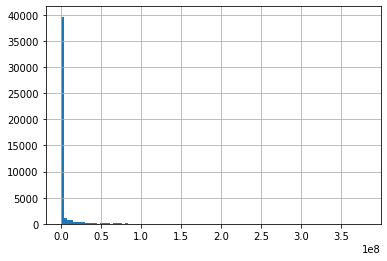

In [29]:
# Histogram with hist pandas method
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline 

# matplotlib histogram
# num_bins = 5
# n, bins, patches = plt.hist(movies_metadata_df.budget, num_bins, facecolor='blue', alpha=0.5)
# plt.show()

hist = movies_metadata_df.budget.hist(bins=100)

### Remove observations with budget == 0

In [30]:
# Create list with indexes of rows with budget = 0
i = movies_metadata_df[(movies_metadata_df.budget == 0)].index

# Drop rows from given list
movies_metadata_df_budget = movies_metadata_df.drop(i)

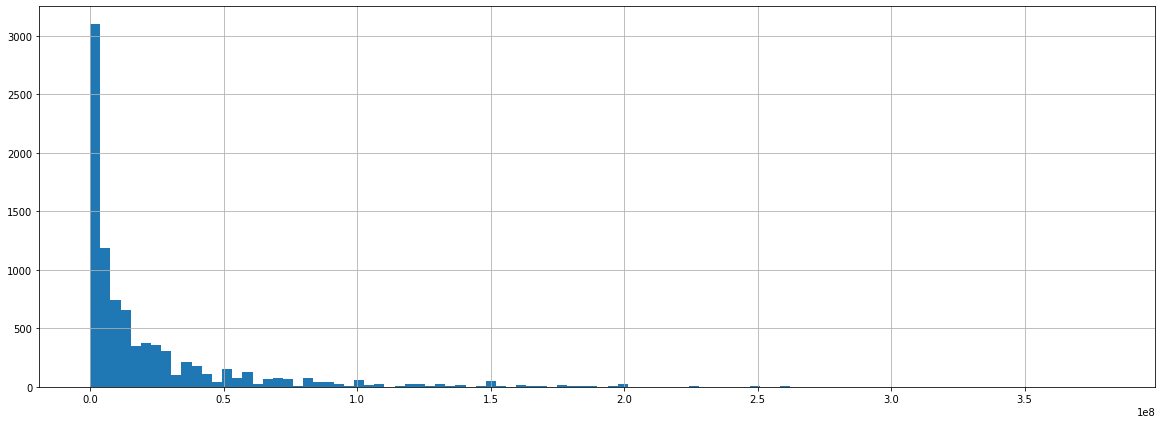

In [31]:
# Plot budget without zeros
hist = movies_metadata_df_budget.budget.hist(bins=100, figsize=(20,7))

In the chart we can see that low level budget in interval from \\$1 to \\$50 mln is the most popular.


In [32]:
movies_metadata_df_budget.budget.sort_values()

31435            1
21319            1
27958            1
2483             1
25093            1
           ...    
44842    260000000
11067    270000000
26558    280000000
11827    300000000
17124    380000000
Name: budget, Length: 8890, dtype: int32

(1000000, 1000000000)

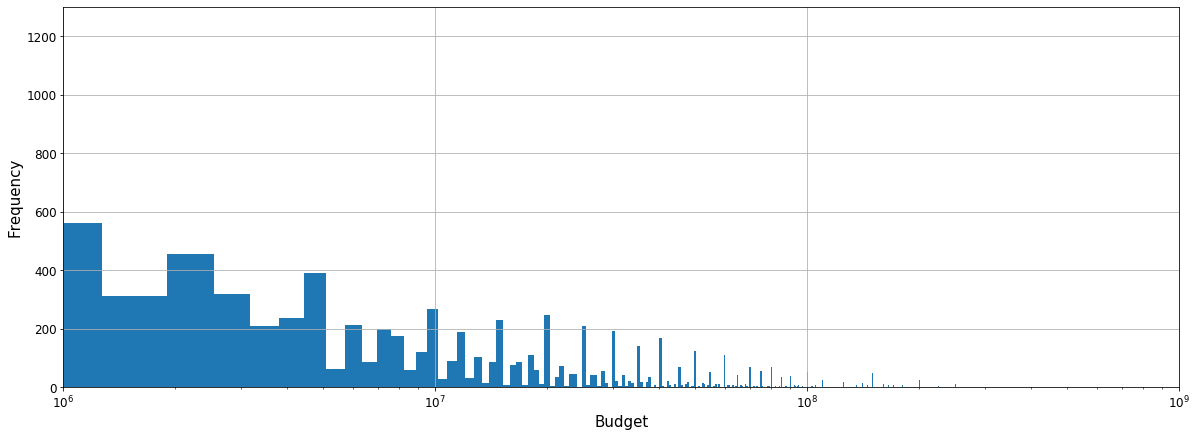

In [33]:
# Show budget above 1 mln on log scale
movies_metadata_df_budget['budget'].hist(bins=600, grid=True, xlabelsize=12, ylabelsize=12, figsize=(20,7))
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xscale('log')
plt.xlim([1_000_000,1_000_000_000])

In the chart above we can see that budgets in interval of \\$10-\\$100 mln are quite popular, but above \\$100 mln are rare.

In [34]:
# Create list with indexes of rows with budget = 0
i = movies_metadata_df_budget[(movies_metadata_df_budget.budget > 1_000_000)].index

# Drop rows from given list
movies_metadata_df_budget_below_1_mln = movies_metadata_df_budget.drop(i)

In [35]:
movies_metadata_df_budget_below_1_mln.budget.sort_values()

43573          1
35579          1
15437          1
15873          1
4000           1
          ...   
40820    1000000
9156     1000000
23342    1000000
8966     1000000
35479    1000000
Name: budget, Length: 1682, dtype: int32

Text(0, 0.5, 'Frequency')

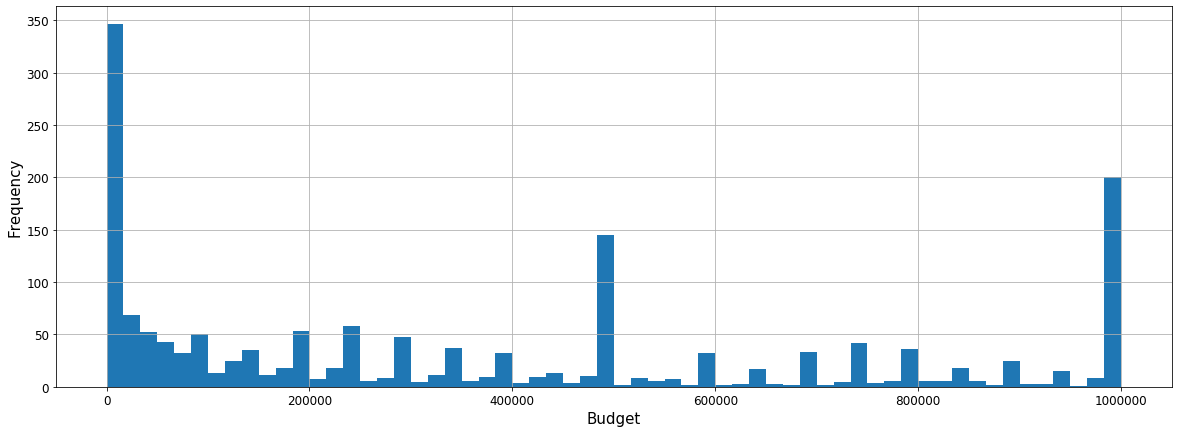

In [36]:
# Show movies budgets below 1 mln on log scale
movies_metadata_df_budget_below_1_mln['budget'].hist(bins=60, grid=True, xlabelsize=12, ylabelsize=12, figsize=(20,7))
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

In the chart above we can see that a lot of movies has a budget around \\$1, which may be treated like \\$0, so like a missing data. Another very frequent budget levels are around \\$500.000 and \\$1.000.000

### original_language variable

Variable named "original_language" is inspected below.

In [37]:
# Printing original_language column
movies_metadata_df.original_language

0        en
1        en
2        en
3        en
4        en
         ..
45461    fa
45462    tl
45463    en
45464    en
45465    en
Name: original_language, Length: 45463, dtype: object

In [38]:
### variable describtion
movies_metadata_df.original_language.describe(include='all')

count     45452
unique       89
top          en
freq      32269
Name: original_language, dtype: object

In [39]:
# Calculate english language popularity as a movies first language
32269/45452

0.7099577576344275

**English language stands for circa 70% of movies first language**

In [40]:
# Show unique elements of a column
movies_metadata_df.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [41]:
# Check variable levels and their frequencies. 30 most frequent results
movies_metadata_df.original_language.value_counts()[0:30]

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
sv      384
pt      316
cn      313
fi      297
nl      248
da      225
pl      219
tr      150
cs      130
el      113
no      106
fa      101
hu      100
ta       78
th       76
he       67
sr       63
ro       57
te       45
ar       39
Name: original_language, dtype: int64

In [42]:
# Check number of NA in original_language column
movies_metadata_df.original_language.isna().sum()

11

In [43]:
# show indices of rows with NA in original_language column
movies_metadata_df[pd.isna(movies_metadata_df['original_language'])].index

Int64Index([19574, 21602, 22832, 32141, 37407, 41047, 41872, 44057, 44410,
            44576, 44655],
           dtype='int64')

In [44]:
# Create list with indexes of rows with NA
i = movies_metadata_df[pd.isna(movies_metadata_df['original_language'])].index

# Drop rows from given list
movies_metadata_df = movies_metadata_df.drop(i)

In [45]:
# Check if rows with NA in original_language column have been deleted correctly (list should be empty)
movies_metadata_df[pd.isna(movies_metadata_df['original_language'])].index

Int64Index([], dtype='int64')

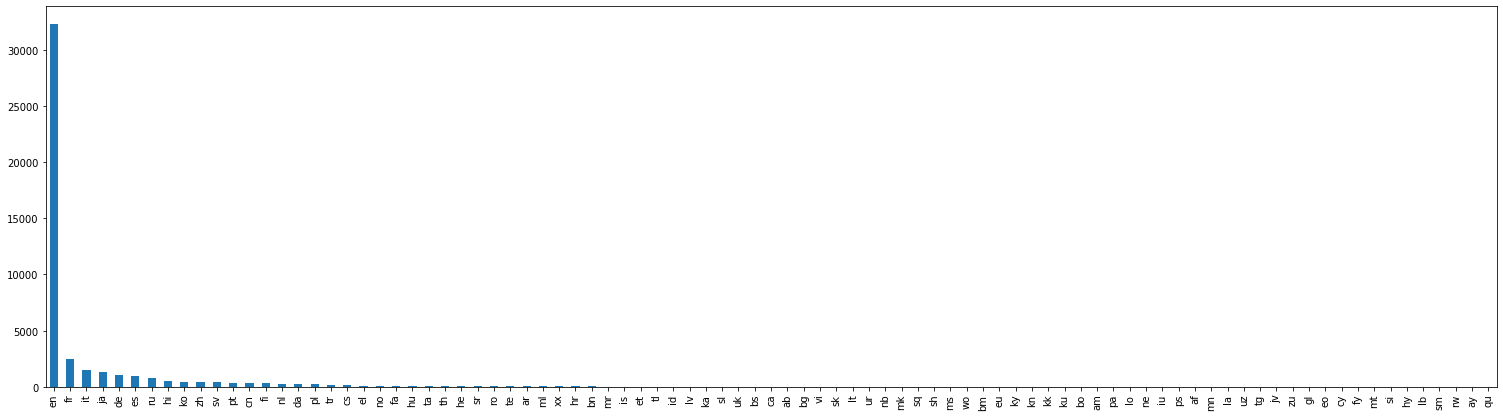

In [46]:
# Barplot original_language column
movies_metadata_df['original_language'].value_counts().plot.bar(figsize=(26,7))


### Remove observations with original_language == 'en'

In [47]:
# Create list with indexes of rows with budget = 0
i = movies_metadata_df[(movies_metadata_df.original_language == 'en')].index

# Drop rows from given list
movies_metadata_df_no_en = movies_metadata_df.drop(i)

In [48]:
# show top 10 languages
movies_metadata_df_no_en['original_language'].value_counts(normalize=False)[:10]


fr    2438
it    1529
ja    1350
de    1080
es     994
ru     826
hi     508
ko     444
zh     409
sv     384
Name: original_language, dtype: int64

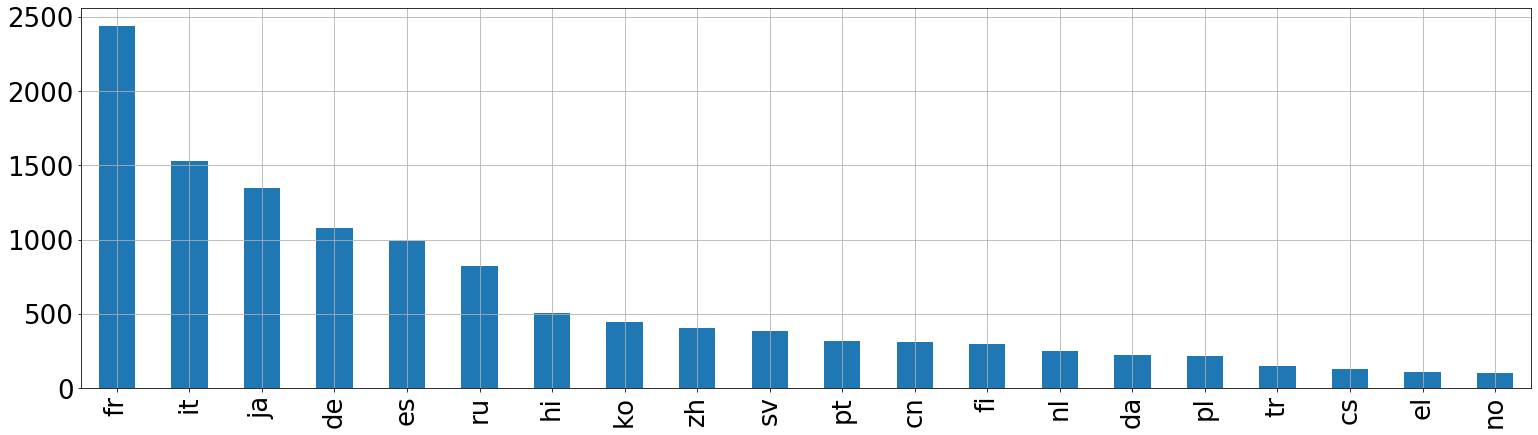

In [49]:
# Barplot of original_language column with no eng language. 20 most frequent results
movies_metadata_df_no_en['original_language'].value_counts()[:20].plot.bar(figsize=(26,7), fontsize=26)
plt.grid()



**In the chart above we can see french language is the most popular movies first language beyond english. Next places take italian, japanese, german, spanish and russian. Polish takes 17th position.**